In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#small_data = '/Users/brandonchea/Desktop/Fall_2022/CS170/Project2/Datasets/CS170_Small_Data__91.txt'
small_text = "/Users/brandonchea/Desktop/Fall_2022/CS170/Project2/Datasets/CS170_Small_Data__91.txt"

small_data_df = pd.read_csv(small_text,
                            sep ='  ',
                            engine = 'python',
                            header = None)

large_text = '/Users/brandonchea/Desktop/Fall_2022/CS170/Project2/Datasets/CS170_Large_Data__103.txt'


large_data_df = pd.read_csv(large_text, 
                         sep='  ',
                         engine = 'python',
                         header=None)


#small_arr = small_data
small_data = small_data_df.to_numpy()

large_data = large_data_df.to_numpy()



def dist(a,b):
    diff = a[1:] - b[1:]
    return(np.dot(diff,diff))

#computer nearest neighbors when passed in a modified dataset
def nn(data_df): #this is correct
    
    number_correctly_classified = 0
    
    for i in range(0,len(data_df)):
        #object_to_classify = data_df.iloc[i]
        object_to_classify = data_df[i,1:]
        #label_object_to_classify = data_df.iloc[i][0]
        label_object_to_classify = data_df[i,0]
        
        nearest_neighbor_distance = float('inf')
        nearest_neighbor_location = float('inf')
        
        for k in range(0,len(data_df)):
            if k!=i:            #object_to_classify,data_df.iloc[k]
                #distance = dist(object_to_classify,data_df[k,1:])
                distance = dist(data_df[i],data_df[k])
                if distance < nearest_neighbor_distance:
                    nearest_neighbor_distance = distance
                    nearest_neighbor_location = k 
                    #data_df.iloc[nearest_neighbor_location][0]
                    nearest_neighbor_label = data_df[nearest_neighbor_location,0]
                    #print(nearest_neighbor_label)               
        if label_object_to_classify == nearest_neighbor_label:
            number_correctly_classified = number_correctly_classified +1 
        
    accuracy = number_correctly_classified / len(data_df)
    #print(accuracy)
    return accuracy

#modifies dataset in order to perform nearest neighbor algorithm
def leave_one_out_cross_validation_forward(data_df,current_set,feature_to_add):
    new_current = current_set[:]
    new_current.append(feature_to_add)
    
    drops = []
    x = 1
    for x in range(1,data_df.shape[1]): #iterate through the columns
        if x not in new_current: #drop that column if it is not inside of the current set
            drops.append(x)
            
        
    #data_df.loc[:,drops] = 0
    new_data_df = data_df.copy()
    new_data_df[:,drops]=0 #

    accuracy = nn(new_data_df)
    return accuracy

        


In [294]:
#we need a function to find the best features in the list
#this is used to find the best feature combinations
features = [0.85, 0.958, 0.932, 0.902, 0.852, 0.808]

def findBest(features):
    return features.index(max(features))

findBest(features)

1

In [295]:

def forward_feature_selection(data):
    current_set_of_features = [] #these are the list with the best accuracies at each level
    best_accuracies=[]
    relevant_feature_tuples = []
    for i in range(1,data.shape[1]):#level
        
        #print("On the ",i," level of the search tree")
        
        feature_to_add_at_this_level = []
        best_so_far_acc = 0
        
        for k in range(1,data.shape[1]):#features
            if k not in current_set_of_features:
                #print("Considering adding feature ",k)
                 
                accuracy = leave_one_out_cross_validation_forward(data,current_set_of_features,k)
                print("Feature(s) {",*current_set_of_features,k,"} accuracy is ",accuracy)
                if (accuracy > best_so_far_acc):
                    best_so_far_acc = accuracy
                    feature_to_add_at_this_level = k
        best_accuracies.append(best_so_far_acc)                     
        current_set_of_features.append(feature_to_add_at_this_level)
        relevant_feature_tuples.append(str(current_set_of_features[:]))
        print("On level ",i," I added feature",feature_to_add_at_this_level," to current set with accuracy",best_so_far_acc)
    print("These are our features",current_set_of_features)
    print("These are the accuracies",best_accuracies)
    
    index_best = findBest(best_accuracies)
    best_feat = current_set_of_features[:index_best+1]
    print("The best set of features are: ",best_feat,"with accuracy",best_accuracies[index_best])
    print("Rel feat tuples",relevant_feature_tuples)
        


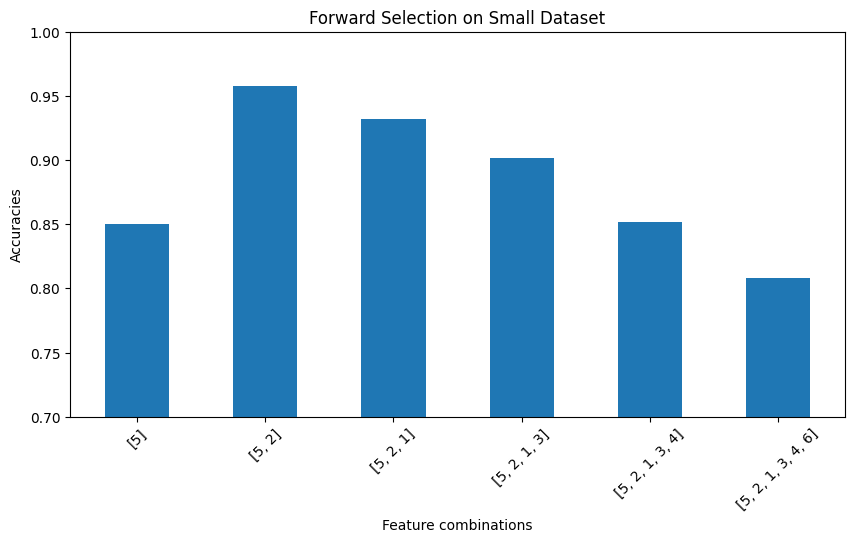

In [242]:
#create visualizations for small dataset using Forward Selection
feat = ['[5]', '[5, 2]', '[5, 2, 1]', '[5, 2, 1, 3]', '[5, 2, 1, 3, 4]', '[5, 2, 1, 3, 4, 6]']
accuracies = [0.85, 0.958, 0.932, 0.902, 0.852, 0.808]

plt.figure(figsize=(10, 5))

plt.bar(feat,accuracies,width = 0.5)
plt.title('Forward Selection on Small Dataset')
plt.xlabel('Feature combinations')
plt.ylabel('Accuracies')

#plt.set_ylim(bottom = 0,top =1)
plt.ylim((0.7,1))
plt.yticks(np.arange(0.7,1,step=0.05))
plt.xticks(rotation = 45)
plt.show()

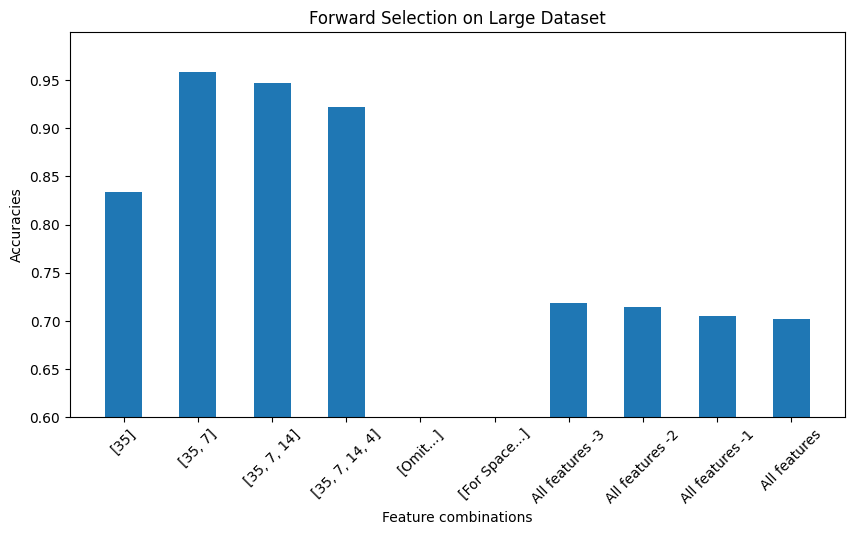

In [288]:
#Create visualizations for Large dataset using Forward Selection
feat = ['[35]', '[35, 7]', '[35, 7, 14]', '[35, 7, 14, 4]','[Omit...]','[For Space...]',
        'All features -3','All features -2','All features -1','All features']
accuracies = [0.834, 0.959, 0.947, 0.922,0,0,0.719, 0.714, 0.705, 0.702]

plt.figure(figsize=(10, 5))

plt.bar(feat,accuracies,width = 0.5)
plt.title('Forward Selection on Large Dataset')
plt.xlabel('Feature combinations')
plt.ylabel('Accuracies')

#plt.set_ylim(bottom = 0,top =1)
plt.ylim((0.6,1))
plt.yticks(np.arange(0.6,1,step=0.05))
plt.xticks(np.arange(10),rotation = 45)


plt.show()

In [296]:
#needed to properly clone the current set when doing backward elimination
def copyArray(data):
    current = []
    for i in range(1,data.shape[1]):
        current.append(i)
    return current


In [297]:
#leave one out using Backward Elimination
def leave_one_out_cross_validation_elimination(data_df,current_set,feature_to_remove):
    new_current = current_set[:]
    new_current.remove(feature_to_remove)
    
    drops = []
    x = 1
    for x in range(1,data_df.shape[1]): #iterate through the columns
        if x not in new_current: #drop that column if it is not inside of the current set
            drops.append(x)
            
        
    #data_df.loc[:,drops] = 0
    new_data_df = data_df.copy()
    new_data_df[:,drops]=0 #

    accuracy = nn(new_data_df)
    return accuracy

In [298]:
#perform backward elimination search
def backward_elimination_feature_selection(data):
    current_set_of_features = copyArray(data)
    #analytics_copy = current_set_of_features
    best_accuracies=[]
    removal_order = []
    
    relevant_feature_tuples = []
    for i in range(1,data.shape[1]):#level
        
        print("On level ",i," of the search tree")
        
        feature_to_add_at_this_level = []
        best_so_far_acc = 0
        
        for k in range(1,data.shape[1]):#features
            if k in current_set_of_features:
                #print("Considering adding feature ",k)
                 
                accuracy = leave_one_out_cross_validation_elimination(data,current_set_of_features,k)
                print("Feature(s) {",*current_set_of_features,"} with removal of",k," Has accuracy:",accuracy)
                if (accuracy > best_so_far_acc):
                    best_so_far_acc = accuracy
                    feature_to_remove = k
        best_accuracies.append(best_so_far_acc)                     
        current_set_of_features.remove(feature_to_remove)
        removal_order.append(feature_to_remove)
        print("On level ",i," I removed feature",feature_to_remove," from the current set with accuracy",best_so_far_acc)
    print("These are our features",current_set_of_features)
    print("These are the accuracies",best_accuracies)
    print("Removal Order", removal_order)
    relevant_feature_tuples.append(str(current_set_of_features[:]))
    index_best = findBest(best_accuracies)
    best_set = removal_order[index_best+1:]
    print("The best set of features are: ",best_set,"with accuracy",best_accuracies[index_best])


In [249]:
#Use this datablock for the sake of getting default rate
print(nn(small_data))

0.808


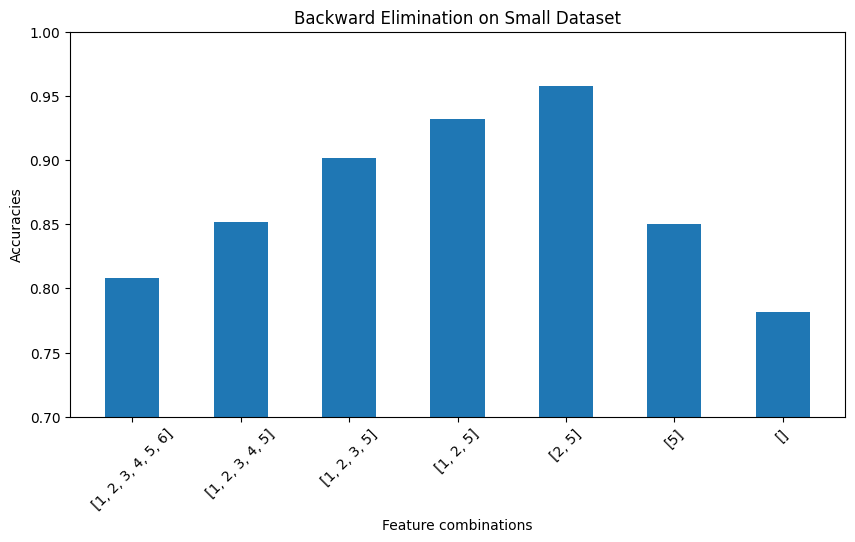

In [290]:
#create visualization for small dataset using backward elimination
feat = ['[1, 2, 3, 4, 5, 6]','[1, 2, 3, 4, 5]', '[1, 2, 3, 5]', '[1, 2, 5]', '[2, 5]', '[5]', '[]']
accuracies = [0.808,0.852, 0.902, 0.932, 0.958, 0.85, 0.782]

plt.figure(figsize=(10, 5))

plt.bar(feat,accuracies,width = 0.5)
plt.title('Backward Elimination on Small Dataset')
plt.xlabel('Feature combinations')
plt.ylabel('Accuracies')

#plt.set_ylim(bottom = 0,top =1)
plt.ylim((0.7,1))
plt.yticks(np.arange(0.7,1,step=0.05))
plt.xticks(rotation = 45)
plt.show()

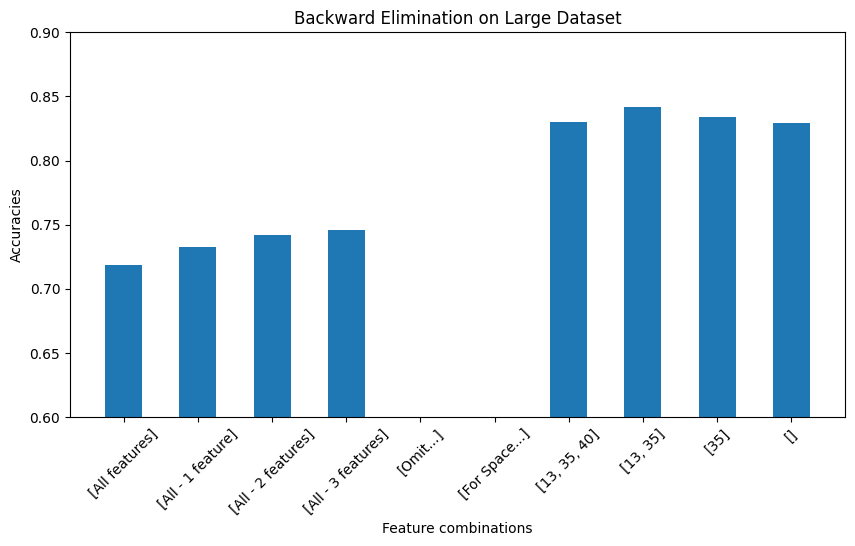

In [289]:
#create visualization for large datset using backward elimination
feat = ['[All features]','[All - 1 feature]','[All - 2 features]','[All - 3 features]',
        '[Omit...]','[For Space...]','[13, 35, 40]','[13, 35]', '[35]', '[]']
accuracies = [0.719,0.733, 0.742, 0.746, 0, 0, 0.83, 0.842, 0.834, 0.829]

plt.figure(figsize=(10, 5))

plt.bar(feat,accuracies,width = 0.5)
plt.title('Backward Elimination on Large Dataset')
plt.xlabel('Feature combinations')
plt.ylabel('Accuracies')

#plt.set_ylim(bottom = 0,top =1)
plt.ylim((0.6,0.9))
plt.yticks(np.arange(0.6,0.9,step=0.05))
plt.xticks(np.arange(10),rotation = 45)
plt.show()